## **Grouped bar chart with labels**

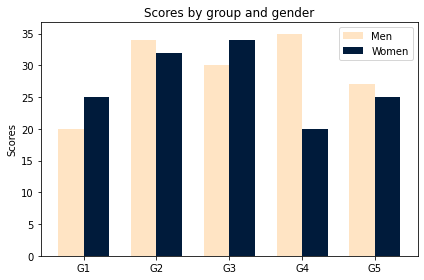

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars


plt.bar(x - width/2, men_means, width, color='#FFE4C4',  label='Men')
plt.bar(x + width/2, women_means,  width, color='#001B3B', label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ticks=x, labels=labels)
plt.legend()

# plt.bar_label( padding=3)
# plt.bar_label( padding=3)

plt.tight_layout()

plt.show()

In [3]:
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

data1= {'group':labels, 'men_means':men_means, 'women_means':women_means }
df = pd.DataFrame(data1)
df

,group,men_means,women_means
0,G1,20,25
1,G2,34,32
2,G3,30,34
3,G4,35,20
4,G5,27,25


In [33]:
# Issue with matplotlib version 3.2.2
import matplotlib
matplotlib.__version__

'3.2.2'

In [1]:
# changed matplotlib version to v3.4.2 to get bar label
# Solution of : AttributeError: 'AxesSubplot' object has no attribute 'bar_label'
!pip install matplotlib==3.4.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.3 MB 4.3 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [10]:
# given the following code to create the dataframe
file="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/coursera/Topic_Survey_Assignment.csv"
df=pd.read_csv(file, index_col=0)

df.sort_values(by=['Very interested'], axis=0, ascending=False, inplace=True)

# all columns are being divided by 2233 so those lines can be replace with the following single line
df = df.div(2233)
df

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,0.755934,0.198836,0.026870
Machine Learning,0.729512,0.213614,0.033139
Data Visualization,0.600090,0.328706,0.045678
Big Data (Spark / Hadoop),0.596507,0.326467,0.056874
Deep Learning,0.565607,0.344828,0.060905
Data Journalism,0.192118,0.484102,0.273175


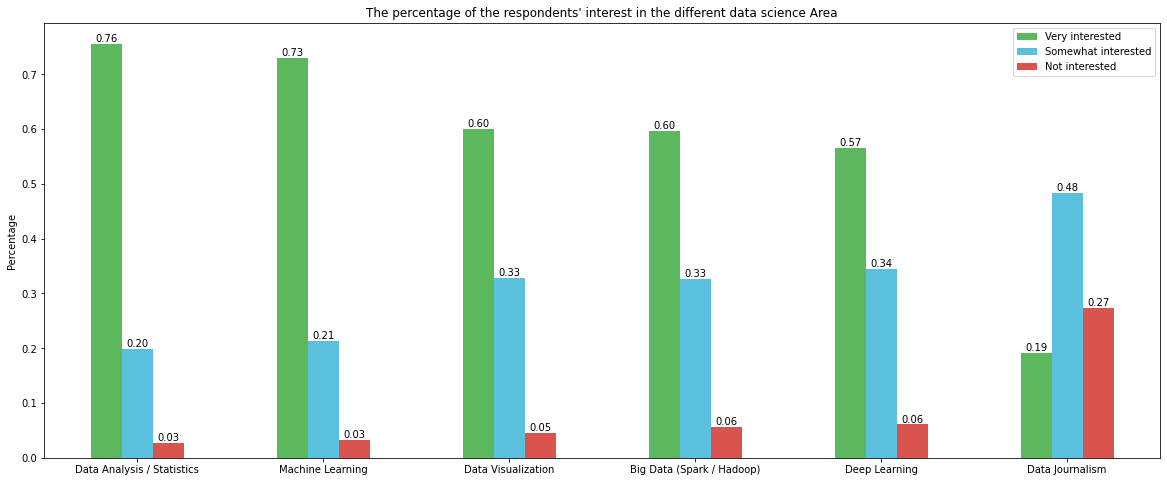

In [9]:
# your colors
colors = ['#5cb85c', '#5bc0de', '#d9534f']

# plot with annotations is probably easier
p1 = df.plot(kind='bar', color=colors, figsize=(20, 8), rot=0, ylabel='Percentage',
             title="The percentage of the respondents' interest in the different data science Area")

for p in p1.containers:
    p1.bar_label(p, fmt='%.2f', label_type='edge')

## **Bar chart with gradients**


- using seaborn barplot to different geadient in different bars

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='a', ylabel='b'>

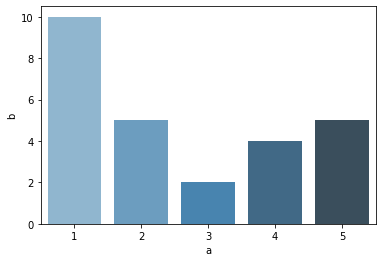

In [15]:
# to different geadient in different bars
df1 = pd.DataFrame({'a':[1,2,3,4,5], 'b':[10,5,2,4,5]})
sns.barplot(df1['a'], df1['b'], palette='Blues_d')

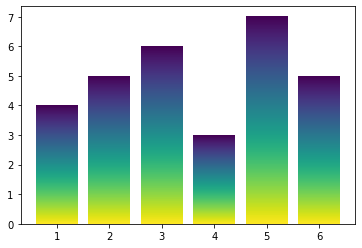

In [16]:
fig, ax = plt.subplots()

bar = ax.bar([1,2,3,4,5,6],[4,5,6,3,7,5])

def gradientbars(bars):
    grad = np.atleast_2d(np.linspace(0,1,256)).T
    ax = bars[0].axes
    lim = ax.get_xlim()+ax.get_ylim()
    for bar in bars:
        bar.set_zorder(1)
        bar.set_facecolor("none")
        x,y = bar.get_xy()
        w, h = bar.get_width(), bar.get_height()
        ax.imshow(grad, extent=[x,x+w,y,y+h], aspect="auto", zorder=0)
    ax.axis(lim)

gradientbars(bar)

plt.show() 